### Libraries

In [3]:
# Libraries:
import streamlit as st
from streamlit_float import *
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import time
from datetime import datetime, timedelta
import statsmodels.api as sm
import pytz
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import log_loss, confusion_matrix  # Import these
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, log_loss, confusion_matrix, accuracy_score # Added metrics
import inspect



### Load, prepare, feature engineering functions and process

In [ ]:
# # old Load data function
# def load_data(symbol, period):
#     try:
#         stock = yf.Ticker(symbol)
#         df_hm = stock.history(period=period)
#         #df_hm.reset_index(inplace=True)
#         if df_hm.empty:
#             print(f"No data available for {symbol}")
#             return None
#         return df_hm
#     except Exception as e:
#         print(f"Error loading data for {symbol}: {e}")
#         return None

In [4]:
# 1 - New load Historical data function: 31-03-2025: --> checked and in use

def load_data(stock_symbol, market_symbol, rf_symbol, period):
    text_title ="LOADING DATA"
    print(f"{'=' * 25} {text_title} {'=' * 25}")
    text_length = len(text_title)+2

    symbols = [stock_symbol, market_symbol, rf_symbol]
    stock_history, market_history, rf_history = None, None, None

    for i, symbol in enumerate(symbols):
        try:
            stock = yf.Ticker(symbol)
            df = stock.history(period=period)
            if df.empty:
                print(f"No data available for {symbol}")
            else:
                print(f"{symbol} data fetched: OK")
                
                if i == 0:
                    stock_history = df
                elif i == 1:
                    market_history = df
                else:
                    rf_history = df
        except Exception as e:
            print(f"Error loading data for {symbol}: {e}")

    print('=' * (50 + text_length))

    return stock_history, market_history, rf_history

In [ ]:
# # Old way to get Data sets
# s_ticker = 'AAPL'
# m_ticker = '^GSPC'
# stock_history = load_data(s_ticker, 'max')
# # print(stock_history.info())
# market_history = load_data(m_ticker, 'max')
# # print(market_history.info())
# rf_history = load_data('^FVX', 'max')
# # print(rf_history.info())

In [5]:
# New way to get data --> checked and in use
stock_history, market_history, rf_history = load_data('AAPL', '^GSPC', '^FVX', 'max')


========================= LOADING DATA =========================
AAPL data fetched: OK
^GSPC data fetched: OK
^FVX data fetched: OK


In [6]:
# Function to get live Stock data: --> checked and in use
def live_data(s_ticker, period, interval):
    text_title ="LOADING DATA"
    print(f"{'=' * 25} {text_title} {'=' * 25}")
    text_length = len(text_title)+2

    # Fetches stock data from yfinance.
    try:
        data = yf.download(s_ticker, period=period, interval=interval)
        return data
    except Exception as e:
        print(f"Failed to fetch data for {s_ticker}: {e}")

    print('=' * (50 + text_length))

    return None

In [7]:
# use live_data function: --> checked and in use
# this code is adjusted for ipynb file the code used for app is n next cell
# Libraries
import time
import yfinance as yf
from IPython.display import display, clear_output

# Function to fetch live stock data (use your custom `live_data` function if necessary)
def live_data(ticker, period='1d', interval='1m'):
    return yf.download(ticker, period=period, interval=interval)

# Prepare
s_ticker = 'AAPL'

# Select period manually or use some predefined logic for selected_period
selected_period = ('1d', '1m')  # Example period and interval

# Start an infinite loop to fetch and display stock data live
while True:
    if s_ticker and selected_period:
        period, interval = selected_period
        stock_live = live_data(s_ticker, period=period, interval=interval)

        if stock_live is not None and not stock_live.empty:
            last_value = stock_live['Close'].tail(1).values[0]  # Get last close price
            # Clear previous output and display the new data
            clear_output(wait=True)
            print(f"Latest Closing Price for {s_ticker}: {last_value}")
            display(stock_live.tail(1))  # Display the last row of the stock data

        else:
            print("Could not retrieve stock data.")
    
    # Wait 60 seconds before refreshing
    #time.sleep(60)


Latest Closing Price for AAPL: [223.13999939]


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Datetime,,,,,
2025-04-01 19:59:00+00:00,223.139999,223.279999,222.929993,223.279999,952113


KeyboardInterrupt: 

In [ ]:
# # use live_data function for streamlit web app: -->checked in use
# # select periods to show data
# selected_period = None

# # Initialize session state for selected period
# if "selected_period" not in st.session_state:
#     st.session_state.selected_period = None

# # create columns for period selectors (buttons)
# cols = st.columns(9)  # Creates a single row with 9 columns
# for col, (label, (period, interval)) in zip(cols, time_ranges.items()):
#     with col:  # Ensures the button stays inside the column
#         if st.button(label, key=f"button_{label}"):
#             st.session_state.selected_period = (period, interval)

# # Use stored period after refresh
# selected_period = st.session_state.selected_period

# # Define stock_live outside to prevent "NameError"
# stock_live = None

# # Get display stock_live data 
# if s_ticker and selected_period:
#     period, interval = selected_period
#     stock_live = live_data(s_ticker, period=period, interval=interval)

# if stock_live is not None and not stock_live.empty:
#     st.subheader(f"{s_ticker}:{stock_live['Close'].tail(1)}")
#     fig = live_chart(stock_live)
#     if fig:
#         st.pyplot(fig)
#     else:
#         st.error("Could not retrieve data or the ticker does not exist.")
# else:
#     st.info("Enter a stock ticker and select a time range to display the chart.")

# # --- Auto-refresh every 60 seconds ---
# st_autorefresh(interval=60 * 1000, key="refresh_stock_chart")


In [ ]:
# # old prepare function
# def prepare(stock_history, market_history, rf_history):
#     # Calculate daily returns
#     stock_history['stock_returns'] = stock_history['Close'].pct_change()
#     market_history['market_returns'] = market_history['Close'].pct_change()
#     rf_history['annual_rf_rates'] = rf_history['Close']/100 # change to decimal
#     rf_history['daily_rf_rates'] = rf_history['Close']/100/252 # get daily rates
#     print(f'Stock data:\n{stock_history.head(1)}\n{stock_history.tail(1)}\nMarket data:\n{market_history.head(1)}\n{market_history.tail(1)}\nRisk free data:\n{rf_history.head(1)}\n{rf_history.tail(1)}')
    
#     # Create future return column: tomorrow
#     stock_history['stock_tomorrow'] = stock_history['stock_returns'].iloc[-1]
#     market_history['market_tomorrow'] = market_history['market_returns'].iloc[-1]
#     rf_history['annual_rf_tomorrow'] = rf_history['annual_rf_rates'].iloc[-1]
#     rf_history['daily_rf_tomorrow'] = rf_history['daily_rf_rates'].iloc[-1]

#     # dropna() and the last two columns
#     try:
#         stock_history = stock_history.dropna().drop(columns=['Dividends', 'Stock Splits'])
#         market_history = market_history.dropna().drop(columns=['Dividends', 'Stock Splits'])
#         rf_history = rf_history.dropna().drop(columns=['Dividends', 'Stock Splits'])
#     except:
#         print('No columns: Dividends and Stock Split')
#         stock_history = stock_history.dropna()
#         market_history = market_history.dropna()
#         rf_history = rf_history.dropna()

    
#     return stock_history, market_history, rf_history

In [8]:
# 2- Function to localize --> checked and in use
def localize(stock_history, market_history, rf_history):

    text_title ="LOCALIZE INDEX"
    print(f"{'=' * 25} {text_title} {'=' * 25}")
    text_length = len(text_title)+2

    data_dict = {'stock_history': stock_history, 'market_history': market_history, 'rf_history': rf_history}

    # Localize datasets
    for name, df in data_dict.items():
        if df.index.tz is not None:
            try:
                df.index = df.index.tz_localize(None)
                print(f'{name} localized: OK.')
            except Exception as e:
                print(f'Error localizing {name}: {e}')
        else:
            print(f'{name} already localized.')

    print('=' * (50 + text_length))

    return stock_history, market_history, rf_history

In [9]:
# use localize function : checked and in use
stock_history, market_history, rf_history = localize(stock_history, market_history, rf_history)

========================= LOCALIZE INDEX =========================
stock_history localized: OK.
market_history localized: OK.
rf_history localized: OK.


In [10]:
# New prepare function :31-03-2025-->checked and in use

def prepare(stock_history, market_history, rf_history):
    text_title ="PREPARING DATASETS"
    print(f"{'=' * 25} {text_title} {'=' * 25}")
    text_length = len(text_title)+2
    
    
    # Ensure Close column exists before proceeding
    for df, name in zip([stock_history, market_history, rf_history], ['Stock', 'Market', 'Risk-Free']):
        if 'Close' not in df.columns:
            raise ValueError(f"Missing 'Close' column in {name} data")
    
    # Create new return and excess return columns
    stock_history['stock_returns'] = stock_history['Close'].pct_change()
    market_history['market_returns'] = market_history['Close'].pct_change()
    rf_history['annual_rf_rates'] = rf_history['Close'] / 100  # Convert to decimal
    rf_history['daily_rf_rates'] = rf_history['annual_rf_rates'] / 252  # Get daily rates
    
    stock_history['stock_excess'] = stock_history['stock_returns'].sub(rf_history['daily_rf_rates'], fill_value=0)
    market_history['market_excess'] = market_history['market_returns'].sub(rf_history['daily_rf_rates'], fill_value=0)
    
    # Store last values for tomorrow’s returns and create dummy variables
    for df, return_col, tomorrow_col, dummy_col in [
        (stock_history, 'stock_returns', 'stock_tomorrow', 'tomorrow_dummy'),
        (market_history, 'market_returns', 'market_tomorrow', 'tomorrow_dummy')
    ]:
        df[tomorrow_col] = df[return_col].shift(-1)
        df[dummy_col] = df[tomorrow_col].gt(0).astype(int)
    
    for df, rate_col, tomorrow_col in [
        (rf_history, 'annual_rf_rates', 'annual_rf_tomorrow'),
        (rf_history, 'daily_rf_rates', 'daily_rf_tomorrow')
    ]:
        df[tomorrow_col] = df[rate_col].shift(-1)
    
    # Validate column creation
    required_columns = {
        'Stock': ['stock_returns', 'stock_excess', 'stock_tomorrow', 'tomorrow_dummy'],
        'Market': ['market_returns', 'market_excess', 'market_tomorrow', 'tomorrow_dummy'],
        'Risk-Free': ['annual_rf_rates', 'daily_rf_rates', 'annual_rf_tomorrow', 'daily_rf_tomorrow']
    }
    for df, name in zip([stock_history, market_history, rf_history], required_columns.keys()):
        for col in required_columns[name]:
            if col in df.columns and not df[col].isna().all():
                print(f"New column '{col}': OK")
            else:
                print(f"New column '{col}': MISSING")
    
    # Drop unwanted columns and handle missing data
    drop_cols = ['Dividends', 'Stock Splits']
    for df, name in zip([stock_history, market_history, rf_history], ['Stock', 'Market', 'Risk-Free']):
        df.drop(columns=[col for col in drop_cols if col in df.columns], errors='ignore', inplace=True)
        df.dropna(inplace=True)
        print(f"{name} Data Cleaned: OK")
    
    print('=' * (50 + text_length))

    return stock_history, market_history, rf_history


In [ ]:
# # New prepare function :31-03-2025-->checked
# # clean datasets

# def prepare(stock_history, market_history, rf_history):
#     text_title ="PREPARING DATASETS"
#     print(f"{'=' * 25} {text_title} {'=' * 25}")
#     text_length = len(text_title)+2
    
    
#     # Create new columns
#     stock_history['stock_returns'] = stock_history['Close'].pct_change()
#     market_history['market_returns'] = market_history['Close'].pct_change()
#     rf_history['annual_rf_rates'] = rf_history['Close']/100 # change to decimal
#     rf_history['daily_rf_rates'] = rf_history['Close']/100/252 # get daily rates

#     # Check if new columns are created successfully
#     new_columns = ['stock_returns', 'market_returns', 'annual_rf_rates', 'daily_rf_rates']
#     for df, col in zip([stock_history, market_history, rf_history, rf_history], new_columns):
#         if col in df.columns and not df[col].empty:
#             print(f"New column '{col}': OK")
#         else:
#             print(f"Failed to create column '{col}' or column is empty.")

#     # Create future return column: tomorrow
#     stock_history['stock_tomorrow'] = stock_history['stock_returns'].iloc[-1]
#     market_history['market_tomorrow'] = market_history['market_returns'].iloc[-1]
#     rf_history['annual_rf_tomorrow'] = rf_history['annual_rf_rates'].iloc[-1]
#     rf_history['daily_rf_tomorrow'] = rf_history['daily_rf_rates'].iloc[-1]

#     # Check if new 'tomorrow' columns are created successfully
#     tomorrow_columns = ['stock_tomorrow', 'market_tomorrow', 'annual_rf_tomorrow', 'daily_rf_tomorrow']
#     for df, col in zip([stock_history, market_history, rf_history, rf_history], tomorrow_columns):
#         if col in df.columns and not df[col].empty:
#             print(f"New column '{col}': OK")
#         else:
#             print(f"Failed to create column '{col}' or column is empty.")

#     # dropna() and the last two columns
#     try:
#         columns_to_drop = ['Dividends', 'Stock Splits']
#         stock_history = stock_history.dropna().drop(columns=columns_to_drop)
#         market_history = market_history.dropna().drop(columns=columns_to_drop)
#         rf_history = rf_history.dropna().drop(columns=columns_to_drop)
#         print(f"Columns {', '.join(columns_to_drop)} deleted: OK")
#     except KeyError:
#         print('No columns: Dividends and Stock Split')
#         stock_history = stock_history.dropna()
#         market_history = market_history.dropna()
#         rf_history = rf_history.dropna()
    
#     print('=' * (50 + text_length))
#     return stock_history, market_history, rf_history


In [11]:
# Function to Check datasets tail: 31-03-2025 --> checked and in use
def check_tail(*args):
    text_title = "CHECK LAST ROW"
    print(f"{'=' * 25} {text_title} {'=' * 25}")
    text_length = len(text_title) + 2
    
    # Get the calling frame
    frame = inspect.currentframe().f_back
    
    # Get the argument names as they were passed to the function
    arg_names = list(frame.f_locals.keys())
    arg_dict = {name: value for name, value in frame.f_locals.items() if name in arg_names}    
    
    for arg in args:
        name = next((name for name, value in arg_dict.items() if value is arg), "Unnamed Input")
        print(f"\nProcessing input: {name}")
        try:
            if isinstance(arg, pd.DataFrame):
                print(f"DataFrame last row:")
                print(arg.tail(1))
            elif isinstance(arg, pd.Series):
                print(f"Series last value:")
                print(arg.iloc[-1])
            else:
                print(f"Unsupported type: {type(arg)}")
        except Exception as e:
            print(f"Error processing {name}: {str(e)}")
        
    
    print('=' * (50 + text_length))




In [12]:
# Use prepare function ---> checked and in use
stock_history, market_history, rf_history = prepare(stock_history, market_history, rf_history)

========================= PREPARING DATASETS =========================
New column 'stock_returns': OK
New column 'stock_excess': OK
New column 'stock_tomorrow': OK
New column 'tomorrow_dummy': OK
New column 'market_returns': OK
New column 'market_excess': OK
New column 'market_tomorrow': OK
New column 'tomorrow_dummy': OK
New column 'annual_rf_rates': OK
New column 'daily_rf_rates': OK
New column 'annual_rf_tomorrow': OK
New column 'daily_rf_tomorrow': OK
Stock Data Cleaned: OK
Market Data Cleaned: OK
Risk-Free Data Cleaned: OK


In [13]:
# Check data info and tail or last row values --> checked and in use
check_tail(stock_history, market_history, rf_history)

========================= CHECK LAST ROW =========================

Processing input: stock_history
DataFrame last row:
                  Open        High         Low       Close    Volume  \
Date                                                                   
2025-03-31  217.009995  225.619995  216.229996  222.130005  65299300   

            stock_returns  stock_excess  stock_tomorrow  tomorrow_dummy  
Date                                                                     
2025-03-31       0.019413      0.019255        0.004772               1  

Processing input: market_history
DataFrame last row:
                   Open         High         Low        Close      Volume  \
Date                                                                        
2025-03-31  5527.910156  5627.560059  5488.72998  5611.850098  5257250000   

            market_returns  market_excess  market_tomorrow  tomorrow_dummy  
Date                                                                        
2

In [ ]:
# ## Old Function to filter based on the given period
# def date_filter(stock_history, market_history, rf_history):
#     ## Date filter
#     max_period = 5  # Define the period in years
#     end_date = pd.Timestamp.now().tz_localize(None)
#     start_date = (end_date - pd.DateOffset(years=max_period)).tz_localize(None)  # Changed to use DateOffset

#     # Ensure timezones are removed
#     data_dict = {'stock_history': stock_history, 'market_history': market_history, 'rf_data': rf_history}

#     for name, df in data_dict.items():
#         if df.index.tz is not None:
#             print(f'{name} before localizing:\n{df.index}')
#             df.index = df.index.tz_localize(None)
#             print(f'{name} after localizing:\n{df.index}')
#         print('=================================================================')# Add a blank line for readability

#     # step 3: Filter data to match the desired period
#     filtered_stock_data = stock_history.loc[start_date:end_date].dropna()
#     filtered_market_data = market_history.loc[start_date:end_date].dropna()
#     filtered_rf_data = rf_history.loc[start_date:end_date].dropna()
#     data_dict = {'filtered_stock_data': filtered_stock_data, 'filtered_market_data': filtered_market_data, 'filtered_rf_data': filtered_rf_data}
#     print('Datasets after filtering')
#     for name, df in data_dict.items():
            
#         print(f'{name}\n{df.head(1)}')
#         print('=============================================================')
#     print()
#     return filtered_stock_data, filtered_market_data, filtered_rf_data


In [14]:
# New Function to filter based on the given period_ 31-03-2025 --> checked and in use
def date_filter(stock_history, market_history, rf_history):
    text_title ="DATE FILTERING AND CREATING NEW SETS"
    print(f"{'=' * 25} {text_title} {'=' * 25}")
    text_length = len(text_title)+2

    max_period = 5  # Define the period in years
    end_date = pd.Timestamp.now().tz_localize(None)
    start_date = (end_date - pd.DateOffset(years=max_period)).tz_localize(None)

    print(f'Max_period: {max_period} years')
    print(f'Start Date: {start_date}')
    print(f'End Date: {end_date} years')
    data_dict = {'stock_history': stock_history, 'market_history': market_history, 'rf_data': rf_history}

    # Filter datasets
    filtered_stock_history, filtered_market_history, filtered_rf_data = None, None, None
    for name, df in data_dict.items():
        try:
            filtered_df = df.loc[start_date:end_date].dropna()
            print(f'Filtered {name} created: OK')
            if name == 'stock_history':
                filtered_stock_history = filtered_df
            elif name == 'market_history':
                filtered_market_history = filtered_df
            else:
                filtered_rf_data = filtered_df
        except Exception as e:
            print(f'Error filtering {name}: {e}')
    print('=' * (50 + text_length))

    return filtered_stock_history, filtered_market_history, filtered_rf_data


In [15]:
# use filter function --> checked and in use
filtered_stock_data, filtered_market_data, filtered_rf_data = date_filter(stock_history, market_history, rf_history)

========================= DATE FILTERING AND CREATING NEW SETS =========================
Max_period: 5 years
Start Date: 2020-04-02 09:13:33.047174
End Date: 2025-04-02 09:13:33.047174 years
Filtered stock_history created: OK
Filtered market_history created: OK
Filtered rf_data created: OK


In [ ]:
# # old Function to extract returns and rates
# def extract_returns(filtered_stock_data, filtered_market_data, filtered_rf_data):
#     text_title ="EXTRACT RETURNS"
#     print(f"{'=' * 25} {text_title} {'=' * 25}")
#     text_length = len(text_title)+2

#     # Match dates across datasets
#     common_dates = filtered_stock_data.index.intersection(filtered_market_data.index).intersection(filtered_rf_data.index)

#     # Check if there are common dates
#     if len(common_dates) > 0:
#         # Extract data for common dates
#         stock_returns = filtered_stock_data.loc[common_dates, 'stock_returns']
#         market_returns = filtered_market_data.loc[common_dates, 'market_returns']
#         daily_rf_rate = filtered_rf_data.loc[common_dates, 'daily_rf_rates']
#         annual_rf_rate = filtered_rf_data.loc[common_dates, 'annual_rf_rates']

#     else:
#         print("No common dates found across the datasets.")
    
#     print('=' * (50 + text_length))


#     return stock_returns, market_returns, daily_rf_rate, annual_rf_rate


In [16]:
# New function to extract returns and rates: 31-03-2023 --> checked and in use
def extract_returns(filtered_stock_data, filtered_market_data, filtered_rf_data):
    text_title ="EXTRACT RETURNS"
    print(f"{'=' * 25} {text_title} {'=' * 25}")
    text_length = len(text_title)+2

    # Ensure all dataframes have a datetime index
    for df in [filtered_stock_data, filtered_market_data, filtered_rf_data]:
        if not isinstance(df.index, pd.DatetimeIndex):
            df.index = pd.to_datetime(df.index)

    common_dates = filtered_stock_data.index.intersection(filtered_market_data.index).intersection(filtered_rf_data.index)
    
    if len(common_dates) == 0:
        print("No common dates found across the datasets.")
        return None, None, None, None

    print(f"Found {len(common_dates)} common dates for alignment")
    
    try:
        # Extract returns and rates
        stock_returns = filtered_stock_data.loc[common_dates, 'stock_returns']
        stock_excess =  filtered_stock_data.loc[common_dates, 'stock_excess']
        market_returns = filtered_market_data.loc[common_dates, 'market_returns']
        market_excess = filtered_market_data.loc[common_dates, 'market_excess']

        daily_rf_rates = filtered_rf_data.loc[common_dates, 'daily_rf_rates']
        annual_rf_rates = filtered_rf_data.loc[common_dates, 'annual_rf_rates']
        

        # Verify extractions
        for name, series in [('stock_returns', stock_returns), ('stock_excess', stock_excess), ('market:returns', market_returns), 
                             ('market_excess', market_excess), ('daily_rf_rates', daily_rf_rates), ('annual_rf_rates', annual_rf_rates)]:
            if not series.empty:
                print(f"{name} Extraction: OK (Length: {len(series)})")
            else:
                print(f"{name} Extraction: Failed (Empty series)")

    except KeyError as e:
        print(f"Column not found: {e}")
        return None, None, None, None
    
    except Exception as e:
        print(f"Unexpected error during extraction: {e}")
        return None, None, None, None

    print('=' * (50 + text_length))

    return stock_returns, stock_excess, market_returns, market_excess, daily_rf_rates, annual_rf_rates


In [17]:
# extract returns usage: ---> checked and in use
stock_returns, stock_excess, market_returns, market_excess, daily_rf_rates, annual_rf_rates = extract_returns(filtered_stock_data, filtered_market_data, filtered_rf_data)

========================= EXTRACT RETURNS =========================
Found 1254 common dates for alignment
stock_returns Extraction: OK (Length: 1254)
stock_excess Extraction: OK (Length: 1254)
market:returns Extraction: OK (Length: 1254)
market_excess Extraction: OK (Length: 1254)
daily_rf_rates Extraction: OK (Length: 1254)
annual_rf_rates Extraction: OK (Length: 1254)


In [18]:
# check series last row from extract function: --> checked and in use
check_tail(stock_returns, stock_excess, market_returns, market_excess, daily_rf_rates, annual_rf_rates)

========================= CHECK LAST ROW =========================

Processing input: stock_returns
Series last value:
0.019412625538381745

Processing input: stock_excess
Series last value:
0.019254569981236733

Processing input: market_returns
Series last value:
0.005538521570653376

Processing input: market_excess
Series last value:
0.005380466013508363

Processing input: daily_rf_rates
Series last value:
0.00015805555714501276

Processing input: annual_rf_rates
Series last value:
0.039830000400543214


In [ ]:
# Function to check and print data types

In [19]:
# Function to calculate beta --> checked and in use
# def calculate_beta(stock_returns, market_returns):
#     # covariance = np.cov(stock_returns, market_returns)[0][1]
#     # market_variance = np.var(market_returns)
#     # beta = covariance / market_variance
#     X = sm.add_constant(market_returns)
#     model = sm.OLS(stock_returns, X, missing='drop').fit()
#     beta = model.params[0] # Corrected: beta is slope, not intercept
#     return beta
import statsmodels.api as sm
import numpy as np
import pandas as pd

def calculate_beta(stock_returns, market_returns):
    text_title = "CALCULATE BETA"
    print(f"{'=' * 25} {text_title} {'=' * 25}")
    text_length = len(text_title) + 2

    # Convert inputs to pandas Series for alignment and handling missing data
    stock_returns = pd.Series(stock_returns)
    market_returns = pd.Series(market_returns)

    # Check for missing or invalid data
    if stock_returns.isnull().any() or market_returns.isnull().any():
        print("Error: Missing values detected in input data.")
        return None

    if len(stock_returns) != len(market_returns):
        print("Error: Mismatched lengths between stock and market returns.")
        return None

    if stock_returns.var() == 0:
        print("Error: Stock returns have zero variance.")
        return None

    if market_returns.var() == 0:
        print("Error: Market returns have zero variance.")
        return None

    # Add constant for intercept in regression
    X = sm.add_constant(market_returns)
    
    # Fit the model
    try:
        model = sm.OLS(stock_returns, X, missing='drop').fit()
        beta = model.params[1]
        beta = float(beta)  # Beta is the slope (params[1])
        # Check if beta is valid
        if beta is not None and np.isfinite(beta):
            print("BETA: OK")
            print(f"Calculated Beta: {beta}")
        else:
            print("BETA: Calculation Error")

    except Exception as e:
        print(f"Error during regression calculation: {e}")
        return None

    print('=' * (50 + text_length))

    return beta


In [22]:
# use beta calculation function: --> checked and in use
beta_stock = calculate_beta(stock_returns, market_returns)

========================= CALCULATE BETA =========================
BETA: OK
Calculated Beta: 1.2033824262865993


C:\Users\smahd\AppData\Local\Temp\ipykernel_18644\3429658695.py:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = model.params[1]


In [ ]:
# # Old Function to calculate capm
# def capm_old(annual_rf_rates, market_returns, stock_returns, market_excess, stock_excess):
#     # Calculate beta for stock
#     beta_stock = calculate_beta(stock_excess, market_excess)

#     # Calculate risk-free rate (annualized from FVX)
#     risk_free_rate = float(annual_rf_rates.iloc[-1])  # FVX is in percentage

#     # # Calculate market return (annualized)
#     mean_market_return = float(market_returns.mean() * 252)  # 252 trading days in a year
#     current_market_return= market_returns.iloc[-1]  # 252 trading days in a year

#     # Get today's price for stock as a scalar value
#     mean_stock_return =float(stock_returns.mean()*255)
#     current_stock_return = float(stock_returns.iloc[-1])  # Convert to float

#     # Capm calculation
#     capm_return = (risk_free_rate + beta_stock * (mean_market_return - risk_free_rate))


#     # Convert to scalar if it's still a Series
#     if isinstance(current_stock_return, pd.Series):
#         current_stock_return = current_stock_return.item()  # Convert to scalar using .item()

#     # Compare CAPM expected return with current stock return
#     advice = "UNDERVALUED" if capm_return > current_stock_return else "OVERVALUED"


#     print(f'Beta: {beta_stock}')
#     print()
#     print(f'risk_free_rate: {risk_free_rate}')
#     print()
#     print(f'mean market_return: {mean_market_return}')
#     print(f'current market_return: {current_market_return}')
#     print()
#     print(f'Mean stock return: {mean_stock_return}')
#     print(f'Current stock return: {current_stock_return}')
#     print()
#     print(f'Capm: {capm_return}')
#     print()
#     print(f'advice: {advice}')

#     return risk_free_rate, beta_stock, capm_return, mean_market_return, current_market_return, mean_stock_return, current_stock_return, advice



In [ ]:
# Old capm function
#capm_old(annual_rf_rate, market_returns, stock_returns, market_excess, stock_excess)

In [20]:
# New Function to calculate capm: --> checked and in use

def capm_return(beta_stock, risk_free_rate, mean_market_return_annualized, current_stock_market):
    text_title ="CALCULATE CAPM"
    print(f"{'=' * 25} {text_title} {'=' * 25}")
    text_length = len(text_title)+2

    # Capm calculation
    capm_return = (risk_free_rate + beta_stock * (mean_market_return_annualized - risk_free_rate))    
    
    # Convert to scalar if it's still a Series
    if isinstance(current_stock_market, pd.Series):
        current_stock_market = current_stock_market.item()  # Convert to scalar using .item()

    # Compare CAPM expected return with current stock return
    advice = "UNDERVALUED" if capm_return > current_stock_market else "OVERVALUED"
    
    # Print details (like the old function)
    print(f"\nBeta: {beta_stock}")
    print(f"\nrisk_free_rate: {risk_free_rate}")
    print(f"\nmean market_return: {mean_market_return_annualized}")
    print(f"current market_return: {current_stock_market}\n")
    print(f"Capm: {capm_return}\n")
    print(f"advice: {advice}\n")
    print('=' * (50 + text_length))

    return capm_return, advice

In [23]:
# use capm:--> checked in use
### 3.2- Annualized market and stock means and current annual rf rate
mean_market_return_annualized = float(market_returns.mean() * 252)  # 252 trading days in a year
mean_stock_return_annualized = float(stock_returns.mean() * 252) # 252 trading days in a year
current_annual_rf_rate = float(annual_rf_rates.iloc[-1])

### 3.3- Current market, stock returns, current_rf_rate
current_market_return= float(market_returns.iloc[-1]) 
current_stock_return = float(stock_returns.iloc[-1])  # Convert to float

capm_result, advice = capm_return(beta_stock, current_annual_rf_rate, mean_market_return_annualized, current_stock_return)


========================= CALCULATE CAPM =========================

Beta: 1.2033824262865993

risk_free_rate: 0.039830000400543214

mean market_return: 0.17563701047507665
current market_return: 0.019412625538381745

Capm: 0.2032577696907639

advice: UNDERVALUED



In [24]:
# Function to graph capm (SML):
def sml(current_annual_rf_rate, beta_stock, capm_result, mean_market_return_annualized, current_market_return, mean_stock_return_annualized, current_stock_return, advice):
    # Plot the results
    fig, ax = plt.subplots(figsize=(10, 6))

    betas = np.linspace(0, 2, 100)  # Beta values for visualization
    sml_returns = current_annual_rf_rate + betas * (mean_market_return_annualized - current_annual_rf_rate)  # SML formula

    ax.plot(betas, sml_returns*100, label="Security Market Line (SML)", color="blue")

    ax.scatter(beta_stock, capm_return*100, color="red", s=100,
                label=f"stock (β={beta_stock:.2f}, Expected Return={capm_return:.2f}%)")

    ax.scatter(0, current_annual_rf_rate*100, color="green", s=100,
                label=f"Risk-Free Rate ({current_annual_rf_rate:.2f}%)")

    ax.scatter(beta_stock, current_stock_return*100, color="orange", s=100,
                label=f"Current Stock Return ({current_stock_return:.2f}%)")

    long_position = advice
    ax.scatter(beta_stock, mean_market_return_annualized*100, color="orange", s=100,
                label=f"Mean Stock Return ({mean_market_return_annualized:.2f}%)")
    # Add annotations for better readability
    ax.text(beta_stock, mean_market_return_annualized*100, f'Long: Stock is {long_position} ',fontsize=9, ha='right', va='bottom',
            bbox=dict(facecolor='white', edgecolor='black', alpha=0.7))

    ax.scatter(1, current_market_return * 100, color="purple", s=100,
                label=f"Mean Market Return ({current_market_return:.2f}%)")

    ax.scatter(1, mean_market_return_annualized * 100, color="purple", s=100,
                label=f"Current Market Return ({mean_market_return_annualized:.2f}%)")

    ax.set_xlabel("Beta (Systematic Risk)", fontsize=12)
    ax.set_ylabel("Expected Return (%)", fontsize=12)
    ax.set_title("CAPM Analysis with Multiple Points", fontsize=14)

    ax.legend(loc="upper left")

    plt.grid(True, linestyle='--', alpha=0.7)

    st.pyplot(fig)  # Display plot in Streamlit
    #plt.show()   


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from adjustText import adjust_text


def sml(current_annual_rf_rate, beta_stock, capm_result, mean_market_return_annualized, current_market_return, mean_stock_return_annualized, current_stock_return, advice):
        # Title: Plot the Security Market Line (SML)
        fig, ax = plt.subplots(figsize=(10, 6))

        # Title: Generate Beta Values and SML Returns
        betas = np.linspace(0, 2, 100)  # Beta values for visualization
        sml_returns = current_annual_rf_rate + betas * (mean_market_return_annualized - current_annual_rf_rate)  # SML formula

        # Title: Plot SML Line
        ax.plot(betas, sml_returns * 100, label="Security Market Line (SML)", color="blue")

        # Title: Scatter Plots for Stock, Risk-Free Rate, and Market Returns
        ax.scatter(beta_stock, capm_result * 100, color="red", s=100,
                label=f"Stock (β={beta_stock:.2f}, Expected Return={capm_result:.2f}%)")

        ax.scatter(0, current_annual_rf_rate * 100, color="green", s=100,
                label=f"Risk-Free Rate ({current_annual_rf_rate:.2f}%)")

        ax.scatter(beta_stock, current_stock_return * 100, color="orange", s=100,
                label=f"Current Stock Return ({current_stock_return:.2f}%)")

        # Title: Indicate Market Positioning
        long_position = advice
        ax.scatter(beta_stock, mean_stock_return_annualized * 100, color="orange", s=100,
                label=f"Mean Stock Return ({mean_market_return_annualized:.2f}%)")


        # Create the annotation first
        text = ax.text(beta_stock, mean_stock_return_annualized * 100, f'Stock is\n{long_position}', fontsize=9, ha='right', va='bottom',
                bbox=dict(facecolor='white', edgecolor='black', alpha=0.7, boxstyle='round,pad=0.25'))

        # Use adjustText to adjust the text position dynamically to avoid overlap
        adjust_text([text], ax=ax, expand_points=(1.5, 1.5), force_points=0.5, lim=200, only_move={'points': 'xy', 'text': 'xy'})


        # Title: Scatter Plot for Market Returns
        ax.scatter(1, current_market_return * 100 + 0.1, color="purple", s=100,
                label=f"Current Market Return ({current_market_return:.2f}%)")

        ax.scatter(1, mean_market_return_annualized * 100, color="purple", s=100,
                label=f"Mean Market Return ({mean_market_return_annualized:.2f}%)")

        # Title: Configure Plot Labels and Titles
        ax.set_xlabel("Beta (Systematic Risk)", fontsize=12)
        ax.set_ylabel("Expected Return (%)", fontsize=12)
        ax.set_title("CAPM Analysis with Multiple Points", fontsize=14)

        # Title: Display Legend and Grid
        ax.legend(loc="upper left")
        plt.grid(True, linestyle='--', alpha=0.7)

        # Title: Display Plot in Jupyter Notebook
        #plt.show()
        st.pyplot(fig)  # Display plot in Streamlit



2025-04-02 09:15:04.511 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-02 09:15:05.102 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-02 09:15:05.646 
  command:

    streamlit run c:\Desktop\python_projects\project_env\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-04-02 09:15:05.646 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


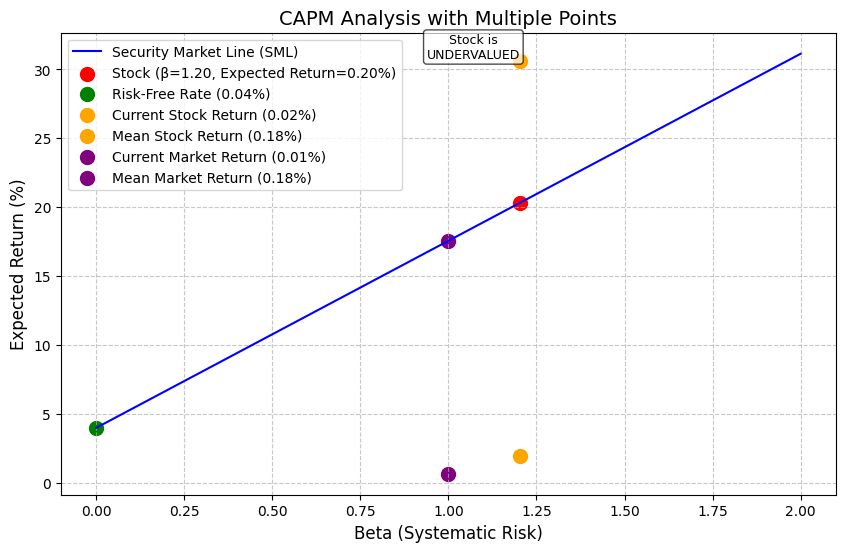

In [26]:
sml(current_annual_rf_rate, beta_stock, capm_result, mean_market_return_annualized, current_market_return, mean_stock_return_annualized, current_stock_return, advice)